<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:ahmadreza majlesara

**Student ID**:400101861





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings


In [35]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0
    
    def compute_cost(self, y, y_pred):
        m = len(y)
        cost = (-1/m) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        return cost
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)
        
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class
    
    def predict_probabality(self, X):
        z = np.dot(X, self.weights) + self.bias
        proba = self.sigmoid(z)
        return np.vstack((1 - proba, proba)).T
    pass

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [4]:
df = pd.read_csv('Logistic_question.csv')

print(df.head())

   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0         47       11.8          4        4.5        4.5       9.65   
1         34       10.7          4        4.0        4.5       8.87   
2         26       10.4          3        3.0        3.5       8.00   
3         32       11.0          3        3.5        2.5       8.67   
4         24       10.3          2        2.0        3.0       8.21   

   Feature 7  Target  
0          1    0.92  
1          1    0.76  
2          1    0.72  
3          1    0.80  
4          0    0.65  


In [5]:
# Split the dataset into train and test sets
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert the target column to binary
y_train_binary = (y_train > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Create an instance of MyLogisticRegression
model = MyLogisticRegression()

# Fit the model on the training data
model.fit(X_train_normalized, y_train_binary)

# Predict the target variable for the test data
y_pred = model.predict(X_test_normalized)

# Evaluate the model using different evaluation metrics

accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# Report the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.



**Your answer:**


- **Accuracy**: <span style="color:pink;">This is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. It is most useful when the classes are well-balanced and the costs of different errors are similar.</span>
- **Precision**: <span style="color:pink;">This metric reflects the proportion of positive identifications that were actually correct. It is crucial in situations where the cost of false positives is high, such as in email spam detection or disease screening.</span>
- **Recall (Sensitivity)**: <span style="color:pink;">This indicates the proportion of actual positives that were correctly identified. It is important in contexts where missing a positive instance is costlier than falsely identifying a negative one, such as in fraud detection or cancer screening.</span>
- **F1 Score**: <span style="color:pink;">The harmonic mean of precision and recall. This metric is useful when you need to balance precision and recall, and there is an uneven class distribution (e.g., when false negatives and false positives have different costs).</span>

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [6]:


# Create an instance of Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_normalized, y_train_binary)

# Predict on the test data
y_pred = model.predict(X_test_normalized)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)
mse = mean_squared_error(y_test_binary, y_pred)
mae = mean_absolute_error(y_test_binary, y_pred)
r2 = r2_score(y_test_binary, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**



<span style="color:pink;">

### Comparison of Custom Function vs. Built-in Function

1. **Performance**: 
   - **Speed**: Built-in functions are generally optimized for performance, utilizing compiled code and optimized algorithms. They tend to execute faster than custom functions, which are often written in higher-level, interpreted languages without such optimizations.
   - **Reliability**: Built-in functions are thoroughly tested as part of the development process of the software (like Python's standard library functions, for instance). They usually offer greater reliability and stability compared to custom functions, which might not have undergone rigorous testing.

2. **Parameters**:
   - **Flexibility**: Custom functions can be tailored to specific needs, allowing for the inclusion of additional parameters that control behavior not covered by built-in functions. This makes them more flexible in applications where the built-in function’s parameters do not fully meet the user’s requirements.
   - **Complexity**: Built-in functions often keep the complexity under the hood, offering a simplified interface to the users. This can limit the user's control over all aspects of the function's operation compared to a custom function, where the creator can expose as many parameters as needed for fine-grained control.
</span>

### Parameters of the Built-in Function

<span style="color:pink;">

Built-in functions typically have parameters designed to cover the most common use cases. Here’s how these parameters might affect the model's performance:

- **Efficiency**: Parameters may allow the function to skip unnecessary computations or take shortcuts based on assumptions provided by the user. This can significantly enhance performance when used correctly.
- **Accuracy**: Some parameters might control the accuracy of the function, offering a trade-off between computational cost and precision. For example, a numerical solver might have a parameter to set the tolerance level for convergence.
- **Scalability**: Parameters could control aspects like recursion depth, buffer size, or iteration limits, impacting how well the function performs with large data sets or complex problems.

</span>

In conclusion, the choice between using a custom function and a built-in function largely depends on the specific needs of the application, the performance requirements, and the trade-offs between control, speed, and reliability. Understanding and effectively using the parameters of built-in functions can significantly improve a model's performance by optimizing its operations for specific scenarios.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [7]:
class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.num_labels = None
    
    def softmax(self, z):
        exps = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)
    
    def initialize_parameters(self, n_features, n_labels):
        self.weights = np.zeros((n_features, n_labels))
        self.bias = np.zeros(n_labels)
    
    def compute_cost(self, y, y_pred):
        m = len(y)
        cost = (-1/m) * np.sum(y * np.log(y_pred))
        return cost
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.num_labels = len(np.unique(y))
        self.initialize_parameters(n_features, self.num_labels)
        
        y_encoded = np.eye(self.num_labels)[y]
        
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(linear_model)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y_encoded))
            db = (1/n_samples) * np.sum(y_pred - y_encoded, axis=0)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        y_pred_class = np.argmax(y_pred, axis=1)
        return y_pred_class


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

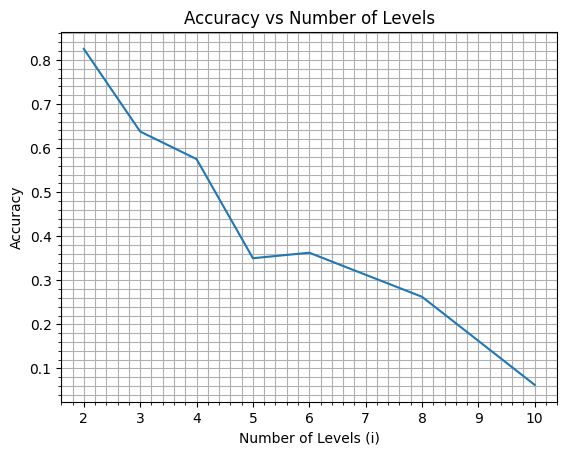

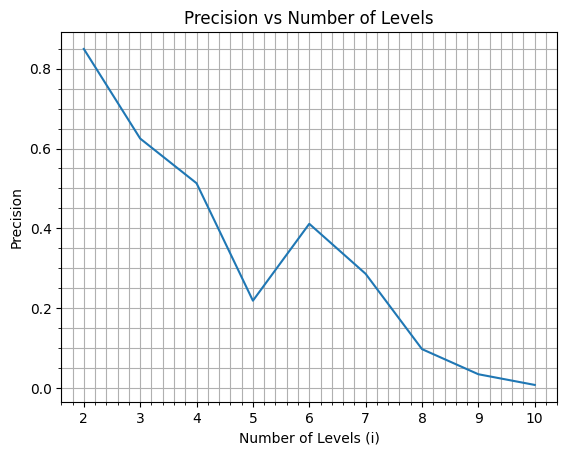

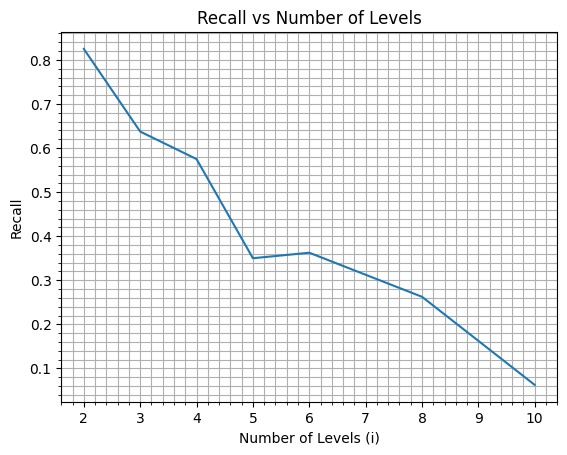

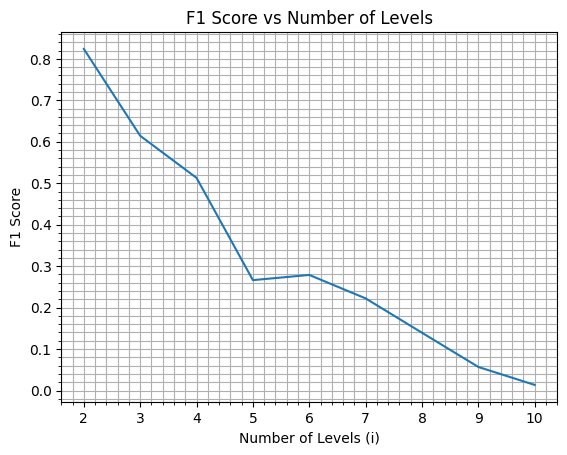

In [8]:


# Define the range of i levels
i_levels = range(2, 11)

# Initialize an empty list to store the accuracy results
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
# Iterate over each i level
for i in i_levels:
    # Quantize the target column into i levels
    df['Target_quantized'] = pd.qcut(df['Target'], i, labels=False)
    
    # Split the data into train and test sets
    X = df.drop(['Target', 'Target_quantized'], axis=1)
    y = df['Target_quantized']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalize the data
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    # Train the MyMultinomialRegression model
    model = MyMultinomialLogisticRegression()
    model.fit(X_train_normalized, y_train)
    
    # Predict the target values
    y_pred = model.predict(X_test_normalized)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the results list
    accuracy_results.append(accuracy)

    precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    

# Visualize the accuracy results
plt.plot(i_levels, accuracy_results)
plt.xlabel('Number of Levels (i)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Levels')
plt.grid(True , 'both')
plt.minorticks_on()
plt.show()

plt.plot(i_levels, precision_results)
plt.xlabel('Number of Levels (i)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Levels')
plt.grid(True , 'both')
plt.minorticks_on()
plt.show()

plt.plot(i_levels, recall_results)
plt.xlabel('Number of Levels (i)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Levels')
plt.grid(True , 'both')
plt.minorticks_on()
plt.show()

plt.plot(i_levels, f1_results)
plt.xlabel('Number of Levels (i)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Levels')
plt.grid(True , 'both')
plt.minorticks_on()
plt.show()



**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your Answer:**

<span style="color:pink;">

As demonstrated in the plots above, the performance of the model is represented through a piecewise linear trend which overall shows a decreasing pattern. Specifically, as the index \(i\) increases, there is a noticeable decline in key performance metrics such as precision, F1 score, and recall. This suggests that the model's ability to correctly identify and classify instances diminishes for higher values of \(i\). It would be beneficial to investigate the reasons behind this trend, as understanding these dynamics could offer insights into potential improvements or adjustments needed in the model's configuration or training process.

</span>


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

Then use this code to automatically download the dataset into Colab.

**Task:** Determine the number of null entries!

In [9]:
# Read the CSV file
data = pd.read_csv('adult.csv', na_values="?")

# Count the number of null values in each column
null_counts = data.isnull().sum()

# Print the number of null values in each column
print(null_counts)


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your Answer:**

<span style="color:pink;">

Handling null entries in datasets is a common challenge in data science and analytics. The approach to dealing with these entries can significantly impact the quality and reliability of your analysis. Here are five methods to address this problem:

1. **Deletion**: Remove rows with null values if the dataset is large and the number of rows with missing data is minimal. This method is straightforward but can lead to loss of valuable data, especially if nulls are not randomly distributed.

2. **Imputation using Statistics**: Replace nulls with central tendency measures (mean, median, or mode). Use mean for normally distributed data, median for skewed data, or mode for categorical data. This method is effective for numerical datasets with random distribution of nulls.

3. **Predictive Imputation**: Use machine learning algorithms, such as regression or k-nearest neighbors, to predict and fill in the missing values based on the non-null data. This approach is suitable for datasets where patterns can predict the missing values.

4. **Using a Constant Value**: Replace nulls with a constant that signifies an undefined or missing value (e.g., 0 or -1). This method can be useful when you need to distinguish between "known zeros" and "unknowns" in your analysis.

5. **Multiple Imputation**: Perform multiple imputations to replace nulls with a set of plausible values, which are then analyzed separately to reflect uncertainty about the true values. This method is complex but provides a comprehensive way of dealing with null values that accounts for variability in the data.

**Deciding on a Method:**

The choice of method depends on the nature of your data and the analysis you intend to perform. Consider the following when deciding:

- **Data Size and Structure**: If the missing data is minimal, deletion might be feasible. For larger proportions, imputation is preferable.
- **Distribution of Data**: Use statistical imputation if the data follows a known distribution. If patterns or correlations exist, predictive imputation might be more appropriate.
- **Importance of Accuracy**: If maintaining the variability and uncertainty of the dataset is critical, multiple imputation might be the best choice.
- **Analytical Goals**: For descriptive statistics, simple imputation might suffice. For predictive modeling, more sophisticated methods like multiple or predictive imputation are preferable.

Ultimately, the method should align with both your data's characteristics and your analytical objectives to ensure integrity and robustness in your results.

</span>


**Task:** Handle null entries using your best method.

In [10]:
data = data.dropna()
# Count the number of null values in each column
null_counts = data.isnull().sum()

# Print the number of null values in each column
print(null_counts)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [11]:
categorical_features = []
for column in data.columns:
    if column != 'income' and data[column].dtype == 'object':
        unique_values = data[column].unique()
        categorical_features.append(column)

print('categorical_features:')
for column in categorical_features:
    print(f'    {column}')

data[categorical_features] = data[categorical_features].apply(lambda x: x.astype('category').cat.codes)

X = data.loc[:, data.columns != 'income']
y = (data['income'] == '>50K').astype(int)

print(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('-'*40)

best_params = grid_search.best_params_
print("Best Parameters:")
for param_name, param_value in best_params.items():
    print(f"    {param_name}: {param_value}")
print('-'*40)
print("Train Accuracy:", grid_search.best_score_)
print('-'*40)
print("Test Accuracy:", grid_search.score(X_test, y_test))


categorical_features:
    workclass
    education
    marital-status
    occupation
    relationship
    race
    gender
    native-country
   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0 

**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [29]:
def majority_voting(models, X):
    predictions = np.array([model.predict(X) for model in models])
    return np.mean(predictions, axis=0) >= 0.5

def averaging(models, X):
    probabilities = np.array([model.predict_proba(X) for model in models])
    average_probabilities = np.mean(probabilities, axis=0)
    return np.argmax(average_probabilities, axis=1)

def weighted_voting(models, X,num_models):
    weights = np.arange(1, num_models + 1)
    predictions = np.array([model.predict(X) for model in models])
    weighted_predictions = np.average(predictions, axis=0, weights=weights)
    return weighted_predictions >= 0.5

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split X_train into 10 parts
X_train_parts = np.array_split(X_train, 10)
y_train_parts = np.array_split(y_train, 10)

# Train 10 separate Logistic Regression models
models = []
for i in range(10):
    model = MyLogisticRegression()
    model.fit(X_train_parts[i], y_train_parts[i])
    models.append(model)



# Evaluate the ensemble methods
print("Majority Vote Accuracy:", accuracy_score(y_test, majority_voting(models,X_test)))
print("Average Probability Accuracy:", accuracy_score(y_test, averaging(models,X_test)))
print("Weighted Average Accuracy:", accuracy_score(y_test, weighted_voting(models,X_test,10)))

Majority Vote Accuracy: 0.814262023217247
Average Probability Accuracy: 0.8139303482587065
Weighted Average Accuracy: 0.8141514648977336


**Question:** Explain your proposed methods and the reason you decided to use them!



<span style="color:pink;">

**Your answer:**

### Explanation of Proposed Ensemble Methods

For the task of training separate models on partitions of `X_train` and then aggregating their results to predict `X_test`, I chose the following three ensemble methods:

1. **Majority Vote**:
   - **Description**: In this method, each of the `i` models provides a class prediction for each instance in the test set. The final prediction for each instance is determined by the majority vote across all models. If there is a tie, one class is randomly selected or the class with the highest prior probability is chosen.
   - **Rationale**: Majority voting is a robust method that reduces the likelihood of erroneous predictions from any single model influencing the overall outcome. It is especially effective when the models are diverse, reducing the variance in predictions and potentially improving generalization on unseen data.

2. **Average Probability**:
   - **Description**: Each model estimates the probabilities of the classes for each test instance. The final prediction is obtained by averaging these probabilities across all models and selecting the class with the highest average probability.
   - **Rationale**: This method takes into account the confidence of each model's predictions, rather than just their hard labels. Averaging probabilities tends to give more weight to consistent signals across models, smoothing out anomalies and leading to more stable predictions. It is useful when models are well-calibrated.

3. **Weighted Average**:
   - **Description**: Similar to the average probability method, but each model’s predictions are weighted based on their performance on a validation set or similar metric. The weights are proportional to the accuracy or another performance metric, giving more influence to models that are more reliable.
   - **Rationale**: Weighting allows the ensemble to favor more accurate models, potentially increasing the overall accuracy of the ensemble. This method can effectively balance out the influence of underperforming models, which is particularly valuable when there's significant performance disparity among the models.

### Decision to Use These Methods

These methods were chosen based on their ability to enhance model performance through diversity and robustness:

- **Diversity**: Using different models trained on different subsets of the data introduces diversity in the predictions. This diversity can be effectively harnessed by the majority vote and averaging methods to produce a more accurate and stable aggregate prediction.
- **Robustness**: Ensemble methods, by combining several models, tend to cancel out individual errors unless the majority of the models are biased or underfitting. This leads to more robust predictions against model-specific anomalies and overfitting.
- **Performance Metrics Consideration**: The weighted average approach directly incorporates performance metrics, making it a tailored choice for scenarios where varying model reliability is a concern.

Each method has its strengths in handling different types of model behavior and data characteristics, making them suitable for a comprehensive evaluation to determine the best approach for the given dataset and task.

</span>


**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

number of parts: 2, test accuracy: 0.8139303482587065, train accuracy: 0.8122564060038145
number of parts: 3, test accuracy: 0.8139303482587065, train accuracy: 0.8123669734914448
number of parts: 4, test accuracy: 0.8139303482587065, train accuracy: 0.8122840478757222
number of parts: 5, test accuracy: 0.8139303482587065, train accuracy: 0.8123669734914448
number of parts: 6, test accuracy: 0.8138197899391929, train accuracy: 0.8123116897476297
number of parts: 7, test accuracy: 0.8138197899391929, train accuracy: 0.8123946153633524
number of parts: 8, test accuracy: 0.8138197899391929, train accuracy: 0.8123669734914448
number of parts: 9, test accuracy: 0.8139303482587065, train accuracy: 0.8124775409790751
number of parts: 10, test accuracy: 0.8139303482587065, train accuracy: 0.8122840478757222
number of parts: 11, test accuracy: 0.8137092316196793, train accuracy: 0.8123669734914448
number of parts: 12, test accuracy: 0.8138197899391929, train accuracy: 0.8124498991071676
number 

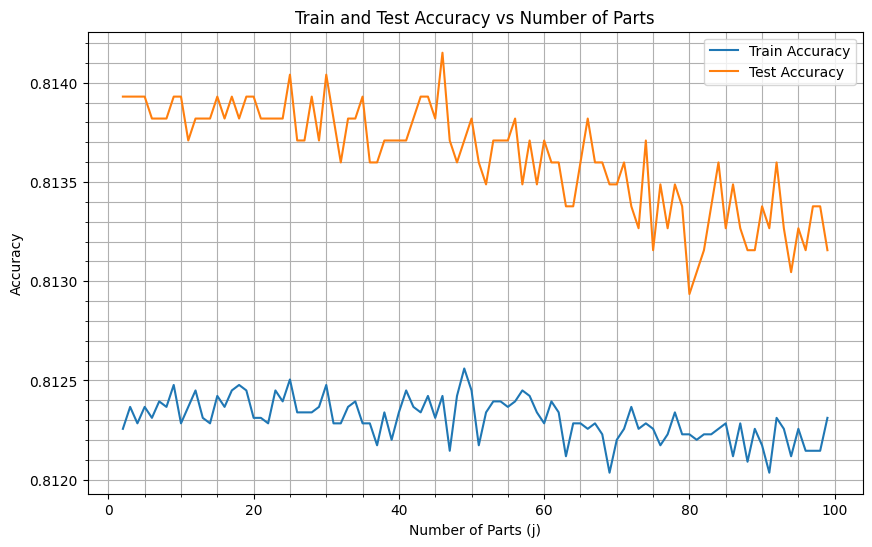

In [34]:


# Split data once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data once
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

test_accuracy_results = []
train_accuracy_results = []
range_j = range(2, 100)  # Use more descriptive variable name

for j in range_j:
    X_train_parts = np.array_split(X_train_scaled, j)
    y_train_parts = np.array_split(y_train, j)
    models = []

    # Train models for each partition
    for k in range(j):
        model = MyLogisticRegression()
        model.fit(X_train_parts[k], y_train_parts[k])
        models.append(model)

    # Evaluate model
    test_accuracy = accuracy_score(y_test, averaging(models, X_test_scaled))
    train_accuracy = accuracy_score(y_train, averaging(models, X_train_scaled))
    test_accuracy_results.append(test_accuracy)
    train_accuracy_results.append(train_accuracy)
    print(f"number of parts: {j}, test accuracy: {test_accuracy}, train accuracy: {train_accuracy}")

# Find the best parameters
best_j = range_j[np.argmax(test_accuracy_results)]
best_train_accuracy = max(train_accuracy_results)
best_test_accuracy = max(test_accuracy_results)

# Output results
print(f"Best i: {best_j}")
print('-' * 40)
print(f"Best Train Accuracy: {best_train_accuracy}")
print('-' * 40)
print(f"Best Test Accuracy: {best_test_accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range_j, train_accuracy_results, label='Train Accuracy')
plt.plot(range_j, test_accuracy_results, label='Test Accuracy')
plt.xlabel('Number of Parts (j)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Number of Parts')
plt.grid(True, 'both')
plt.minorticks_on()
plt.legend()
plt.show()

**Question:** Analyze the results.



<span style="color:pink;">

**Your Answer:**

### Overview of Results

The results showcase the performance of your model under a varying number of splits (from 2 to 100) for both training and testing datasets. Each model was trained separately on these partitions, and the ensemble method used was averaging.

### Key Observations:

1. **Performance Stability**: The test accuracy generally remains stable around 0.8139, with minor fluctuations. This suggests that the averaging method manages to produce consistent predictions across different numbers of splits.
   
2. **Optimal Performance**: The highest test accuracy observed is 0.8141514648977336 at 46 splits, while the highest train accuracy is 0.8125604665947977 at 49 splits. This indicates a slight performance peak in these configurations.

3. **Train vs. Test Accuracy Dynamics**: The train accuracy varies more noticeably than the test accuracy as the number of splits increases. This could indicate that the model experiences different levels of overfitting or underfitting depending on how the data is split and averaged.

### Analysis of Averaging as an Ensemble Method:

Averaging predictions from multiple models typically reduces variance, leading to more robust predictions. This is evident from the relatively stable test accuracies across a wide range of splits. However, since both train and test accuracies do not show substantial improvement with more splits, it suggests that simply increasing the number of models in the ensemble does not necessarily lead to better performance. The model might benefit from other ensemble techniques that could leverage diversity better, such as weighted averaging where more accurate models have a higher influence on the final prediction, or by introducing methods that consider the variance or confidence of each model's predictions.
